In [59]:
from duts import DutsDataset

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Generate trimaps

First, let's try to import the trained model and make a trimap prediction for an image.

In [60]:
trained_model = tf.keras.models.load_model('saved_models/segmentation_model')

In [61]:
ds=ds=DutsDataset("../DUTS")
print(len(ds.training_images), len(ds.test_images))

10553 5019


<AxesSubplot:>

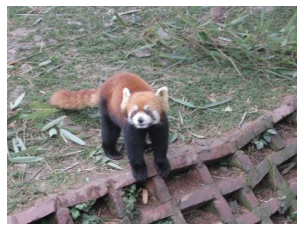

In [62]:
example_img=ds.test_images[np.random.randint(0, len(ds.test_images))]
example_img.show_image()

In [63]:
image=example_img.get_image()
image.shape

(300, 400, 3)

(224, 224, 3)


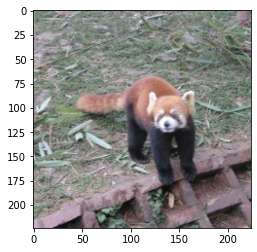

In [64]:
min_dim=np.min(image.shape[:2])
image_cropped=image[:min_dim, :min_dim, :]
image_scaled=cv2.resize(image_cropped, (224,224))
plt.imshow(image_scaled)
print(image_scaled.shape)

In [65]:
tensor=tf.convert_to_tensor([image_scaled.astype(np.float32) / 255.])

In [66]:
prediction=tf.argmax(trained_model.predict(tensor), -1)

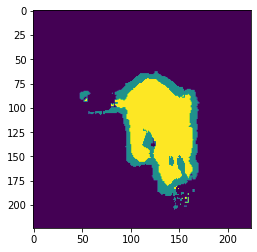

In [67]:
plt.imshow(prediction[0])

## Now update model

We did also an extra training on Collab, so let's update the model with the last checkpoint (epoch 203).

In [68]:
trained_model.load_weights("saved_models/segmentation_updates/checkpoints")


In [69]:
prediction_better=tf.argmax(trained_model.predict(tensor), -1)

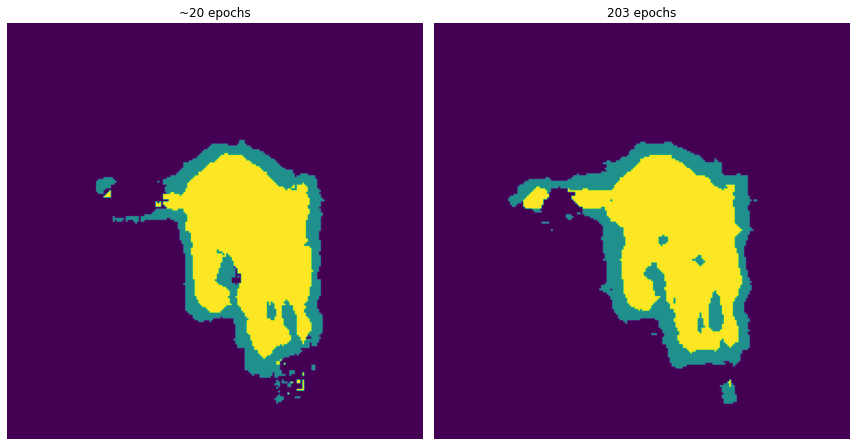

In [70]:
fig,axes=plt.subplots(1,2,figsize=(12,8), )
axes[0].imshow(prediction[0])
axes[0].set_axis_off()
axes[0].set_title("~20 epochs")
axes[1].imshow(prediction_better[0])
axes[1].set_axis_off()
axes[1].set_title("203 epochs")
fig.tight_layout()

## Make a processing pipeline

In [134]:
def show_step(img, title):
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(title)
    plt.show()


def prepare_image(img_path, show_steps=False):
    # load image
    image = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    if show_steps:
        show_step(image, "Original")

    # Resize to 224,224
    image_resized = cv2.resize(image, (224, 224))
    if show_steps:
        show_step(image_resized, "Resized")

    # make tensor
    tensor = tf.convert_to_tensor([image_resized.astype(np.float32) / 255.0])

    # first prediction
    prediction_1 = tf.argmax(trained_model.predict(tensor), -1)[0].numpy().astype(np.float32)
    print(prediction_1)
    if show_steps:
        show_step(prediction_1, "First trimap prediction")
        
    # Scale back to original size
    trimap_upscaled=np.round(cv2.resize(prediction_1, (image.shape[1], image.shape[0])))
    if show_steps:
        show_step(trimap_upscaled, "Final Trimap")
        
    return trimap_upscaled

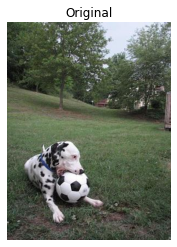

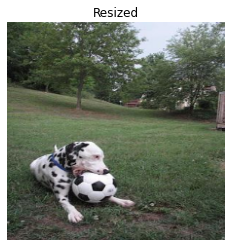

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


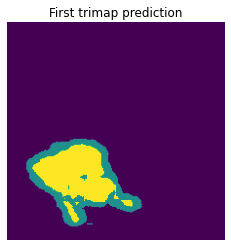

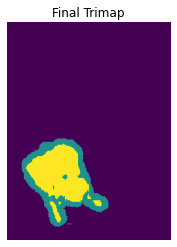

In [135]:
prepare_image("../DUTS/DUTS-TR/DUTS-TR-Image/n04254680_7831.jpg", show_steps=True)